In [1]:
import shapely as sp
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import ICESat2GroundingLineMigration.IceSatHDF5Unpacker as unpack
import src.TrackProfileUtil as util
pd.options.mode.chained_assignment = None

/srv/conda/envs/notebook/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
filepath = "Saves/RAW-Bungen2021-04.json"

In [3]:
gdf = gpd.read_file(filepath)
ylim = (gdf["geometry"].total_bounds[1], gdf["geometry"].total_bounds[3])
xlim = (gdf["geometry"].total_bounds[0], gdf["geometry"].total_bounds[2])

In [7]:
rgts = [56, 559, 574, 635, 1062, 1077]
colors = ["red", "blue", "green", "orange", "purple", "grey"]

In [8]:
basemap = unpack.Basemap("BackgroundData/ATA_adm0.shp")

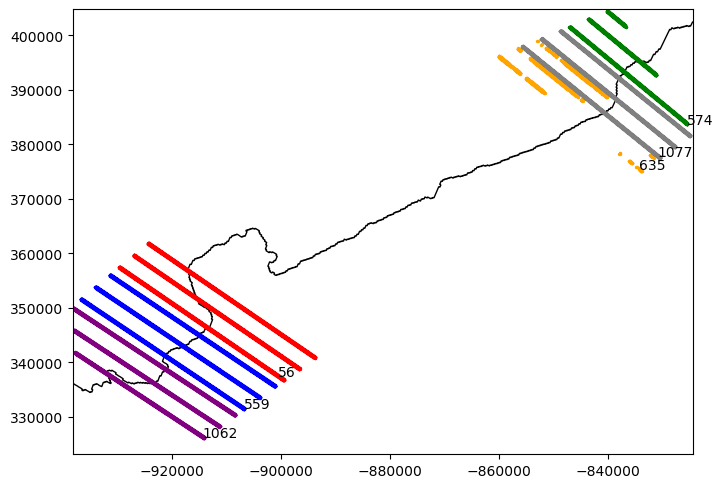

In [9]:
fig, ax = plt.subplots(1,1,figsize=(8, 8))
basemap.basemap_gpd.plot(ax=ax, color="white", edgecolor="black")
#gdf.plot(ax=ax, column="rgt", markersize=2)

for i, rgt in enumerate(rgts):
    reduced = gdf[gdf["rgt"] == rgt]
    reduced = reduced[reduced["quality"] != 1]
    reduced.plot(ax=ax, color=colors[i], markersize=2, aspect=1)
    selected = reduced.iloc[0]
    x, y = selected["geometry"].xy
    plt.text(x[0], y[0], rgt)

ax.set_aspect('equal')
plt.xlim(xlim[0], xlim[1])
plt.ylim(ylim[0], ylim[1])

plt.show()

In [12]:
gdf[gdf["rgt"] == 559]

,slope,angle,azumith_in_xy,dh_fit_dx,dh_fit_dy,date_time,quality,along_track_dist,name,rgt,geometry
9733,-0.005966,0.284745,-0.589325,-0.006880,-0.002075,1.050156e+08,0,37.769404,gt3r,559.0,POINT (-906896.32943 331511.47256)
9734,-0.005541,0.284745,-0.589216,-0.006833,-0.001417,1.050156e+08,0,37.749930,gt3r,559.0,POINT (-906912.51982 331522.29456)
9735,-0.005467,0.284745,-0.589078,-0.009451,-0.001352,1.050156e+08,0,37.730456,gt3r,559.0,POINT (-906928.71170 331533.11432)
9736,-0.005310,0.284745,-0.588885,-0.007639,-0.001032,1.050156e+08,0,37.710981,gt3r,559.0,POINT (-906944.90569 331543.93097)
9737,-0.005706,0.284745,-0.588702,-0.007360,-0.001081,1.050156e+08,0,37.691507,gt3r,559.0,POINT (-906961.10168 331554.74467)
...,...,...,...,...,...,...,...,...,...,...,...
209670,0.000394,-0.391721,-0.589982,0.000222,-0.000162,1.050156e+08,0,9.077891,gt1r,559.0,POINT (-930703.95935 355481.05153)
209671,-0.000922,-0.401059,-0.591832,-0.003348,-0.000297,1.050156e+08,0,9.272623,gt1l,559.0,POINT (-930539.63491 355481.06375)
209672,0.000669,-0.391721,-0.589489,-0.000389,-0.000346,1.050156e+08,0,9.058411,gt1r,559.0,POINT (-930720.15099 355491.88075)
209673,-0.000440,-0.401059,-0.592174,0.000984,-0.000654,1.050156e+08,0,9.253144,gt1l,559.0,POINT (-930555.79727 355491.93632)


In [29]:
rgts = np.unique(gdf["rgt"])
print(rgts)
print(gdf.keys())

rgts = [56, 156, 178, 315, 339, 376, 437, 461, 620, 635, 659, 696, 757, 879, 903, 940, 1062, 1077, 1101, 1162]

[  19.   34.   56.   95.  132.  156.  178.  193.  217.  278.  315.  339.
  376.  400.  437.  461.  498.  620.  635.  659.  696.  720.  757.  781.
  842.  879.  903.  940. 1016. 1040. 1062. 1077. 1101. 1162. 1223. 1321.
 1345.]
Index(['slope', 'angle', 'azumith_in_xy', 'dh_fit_dx', 'dh_fit_dy',
       'date_time', 'quality', 'along_track_dist', 'name', 'rgt', 'geometry'],
      dtype='object')


In [7]:
basemap = unpack.Basemap("BackgroundData/ATA_adm0.shp")

In [9]:
ylim = (gdf["geometry"].total_bounds[1], gdf["geometry"].total_bounds[3])
xlim = (gdf["geometry"].total_bounds[0], gdf["geometry"].total_bounds[2])

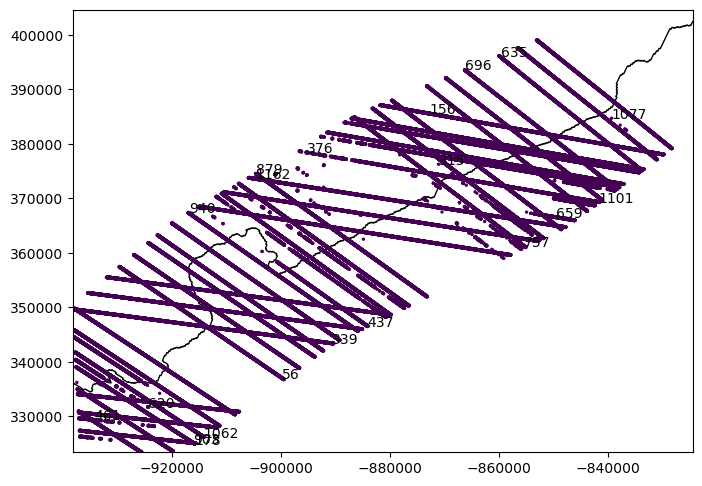

In [32]:
fig, ax = plt.subplots(1,1,figsize=(8, 8))
basemap.basemap_gpd.plot(ax=ax, color="white", edgecolor="black")
#gdf.plot(ax=ax, column="rgt", markersize=2)

for i, rgt in enumerate(rgts):
    reduced = gdf[gdf["rgt"] == rgt]
    reduced.plot(ax=ax, column="rgt", markersize=2, aspect=1)
    if i % 2 == 0:
        selected = reduced.iloc[0]
    else:
        selected = reduced.iloc[-1]
    x, y = selected["geometry"].xy
    plt.text(x[0], y[0], rgt)

ax.set_aspect('equal')
plt.xlim(xlim[0], xlim[1])
plt.ylim(ylim[0], ylim[1])

plt.show()